1. Install Required Libraries

In [1]:
# Install Required Libraries
!pip install pandas scikit-learn matplotlib 
#The (!) exlimtionmark is used to run shell commands in Jypyter Notebook
#Installs pandas (for data handling)
#scikit-learn (for similarity calculation)
#matplotlib(for visualization)


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2. Import Necessar Libraries

In [2]:
# Import Modules
import pandas as pd # Handles dataset loading and manipulation
from sklearn.metrics.pairwise import cosine_similarity #Measures similarity between user prefrence and posts
import matplotlib.pyplot as plt # Creates visualizations

3. Load and Prepare Data

In [3]:
df = pd.read_csv('instagram_dataset.csv') #Reads the dataset from a csv firl into a pandas DataFrame.

# Clean hashtags and convert to list
df['hashtags'] = df['hashtags'].str.split('#') # Splits the hashtags column (which is a single string) into a list of hashags

print("First 5 rows of raw data:") 
display(df.head()) 
#Displays the first 5 rows of the dataset to check its strucure.

First 5 rows of raw data:


,post_id,likes,comments,hashtags
0,post_1,7111,191,"[travel, fitness, food, fashion, music]"
1,post_2,6153,183,"[tech, nature]"
2,post_3,9441,98,"[fashion, art, food, lifestyle]"
3,post_4,5593,240,"[lifestyle, tech, nature, fashion, travel]"
4,post_5,5408,975,[art]


4. One-Hot Encoding of Hashtags

In [4]:
'''One-hot encoding is a technique to convert hashtags into a numbers format for machine learning models can understand.'''

hashtag_dummies = df['hashtags'].explode().str.get_dummies().groupby(level=0).max() 
#Explodes the list of hashtags into separate rows.
#Converts them into binary columns (1 if a hashtag is present, 0 otherwise)

#Merges back with original data
#Creates binary columns for each hashtag
df = pd.concat([df.drop('hashtags', axis=1), hashtag_dummies], axis=1)

print("\nProcessed data with one-hot encoded hashtags:")
# Show first 2 rows and first 8 columns
display(df.iloc[:2, :8])  


Processed data with one-hot encoded hashtags:


,post_id,likes,comments,art,fashion,fitness,food,lifestyle
0,post_1,7111,191,0,1,1,1,0
1,post_2,6153,183,0,0,0,0,0


5. Define User Preferences

In [5]:
user_preferred_hashtags = ['travel', 'food', 'fitness']
#Defines a sample user who likes travel, food, and fitness

# Creates a binary vector
all_hashtags = hashtag_dummies.columns
#A user vector is a numerical representation of a user's preferences, typically as a list or array
#this is used in recommendation systems, machine learning, and NLP to model user interests and behaviors.
user_vector = [1 if tag in user_preferred_hashtags else 0 for tag in all_hashtags]
# 1 means the hashtag is in the user's preference and 0 mean it is not

#This prints a user preference vector by mapping hashtags to their respective values from user_vector.
print(f"\nUser preference vector for {len(all_hashtags)} hashtags:")
#Uses an f-string to dynamically insert the number of hashtags into the text.
print(dict(zip(all_hashtags, user_vector)))
#zip is combines hashtags with their corresponding values and converts this into a dictionary.


User preference vector for 10 hashtags:
{'art': 0, 'fashion': 0, 'fitness': 1, 'food': 1, 'lifestyle': 0, 'music': 0, 'nature': 0, 'photography': 0, 'tech': 0, 'travel': 1}


6. Compute Similarity Scores

In [6]:
#A Similarity Score is a numerical value that measures how similar two data points 
#It helps in recommendation systems, clustering, and search engines by comparing features.
similarity_scores = cosine_similarity([user_vector], hashtag_dummies)
# Computes cosine similarity  between the user's preferences and every post

# Add score column to the DataFrame
df['similarity'] = similarity_scores[0]

print("\nSample posts with similarity scores:")
display(df[['post_id', 'likes', 'comments', 'similarity']].head(3))
#Displays sample posts with their similarity scores


Sample posts with similarity scores:


,post_id,likes,comments,similarity
0,post_1,7111,191,0.774597
1,post_2,6153,183,0.000000
2,post_3,9441,98,0.288675


7. Generate Recommendations

In [7]:
# Sort by higest similarity and selects top 5 recomondations.
recommendations = df.sort_values('similarity', ascending=False).head(5)

print("\nTop 5 Recommended Posts:")
display(recommendations[['post_id', 'likes', 'comments', 'similarity']])
#Display the recomonded posts


Top 5 Recommended Posts:


,post_id,likes,comments,similarity
93,post_94,4867,430,1.000000
376,post_377,9393,233,1.000000
597,post_598,3696,555,0.866025
505,post_506,3156,699,0.866025
158,post_159,7675,412,0.866025


8. Visualization of Recommendations

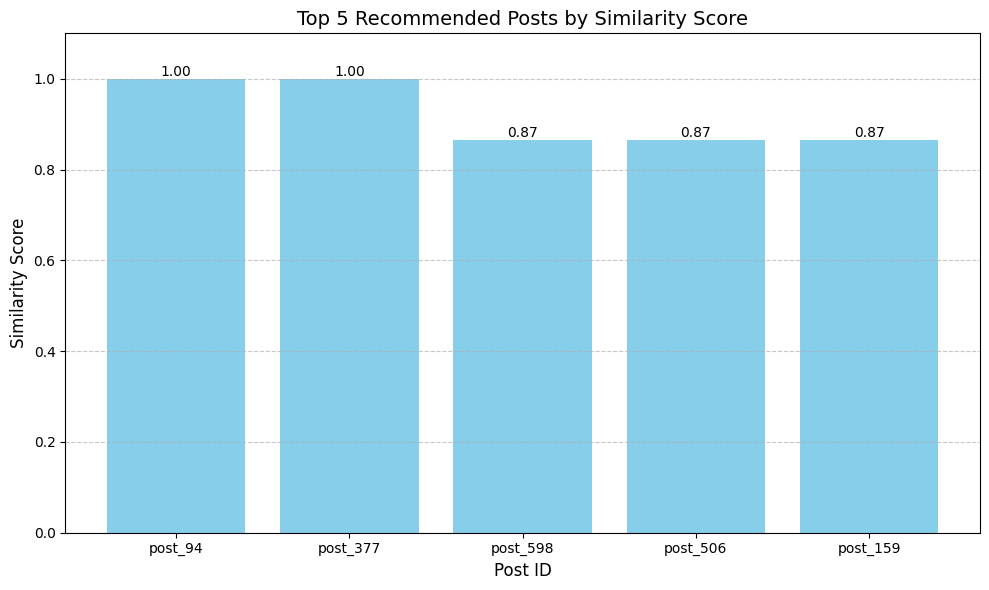

In [8]:
plt.figure(figsize=(10, 6))
bars = plt.bar(recommendations['post_id'], recommendations['similarity'], color='skyblue')
#Creates a bar charts showing similarity  scores of the recommendations

# Add text labels
for bar in bars: #Loops through each bar in the bar chart
    height = bar.get_height() #Gets the height value of the current bar
    plt.text(bar.get_x() + bar.get_width()/2., height, #Centers the text horizontally above the bar
             f'{height:.2f}', #This formats the text to show the height with two decimal places
             ha='center', va='bottom') #this aligns the text to the center horizontally and at the bottom vertically

# Formatting
plt.title('Top 5 Recommended Posts by Similarity Score', fontsize=14) #we sets the title of the plot with a font size of 14
plt.xlabel('Post ID', fontsize=12) #A labels the x-axis as (Post ID) with a font size of 12
plt.ylabel('Similarity Score', fontsize=12) #A labels the y-axis as (Similarity Score) with a font size of 12.
plt.ylim(0, 1.1) #sets the range of the y-axis from 0 to 1.1 to give some space above the bars.
plt.grid(axis='y', linestyle='--', alpha=0.7) #Adds a grid for the y-axis with dashed lines and transparency (alpha = 0.7)
plt.tight_layout() #Adjusts the layout to ensure everything fits without overlap
plt.show() #Displays the plot